In [1]:
import os
import librosa
import numpy as np
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\agarw\anaconda3\envs\MasterEnv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\agarw\anaconda3\envs\MasterEnv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\agarw\anaconda3\envs\MasterEnv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
pwd = os.getcwd()
audio_files = os.listdir(pwd + "\Genres_10")
print(audio_files)

['blues00000_8sec_16000.wav', 'classical00000_8sec_16000.wav', 'country00000_8sec_16000.wav', 'disco00000_8sec_16000.wav', 'hiphop00000_8sec_16000.wav', 'jazz00000_8sec_16000.wav', 'metal00000_8sec_16000.wav', 'pop00000_8sec_16000.wav', 'reggae00000_8sec_16000.wav', 'rock00000_8sec_16000.wav']


# Waveform vs Mel Spectrogram vs Spectrogram

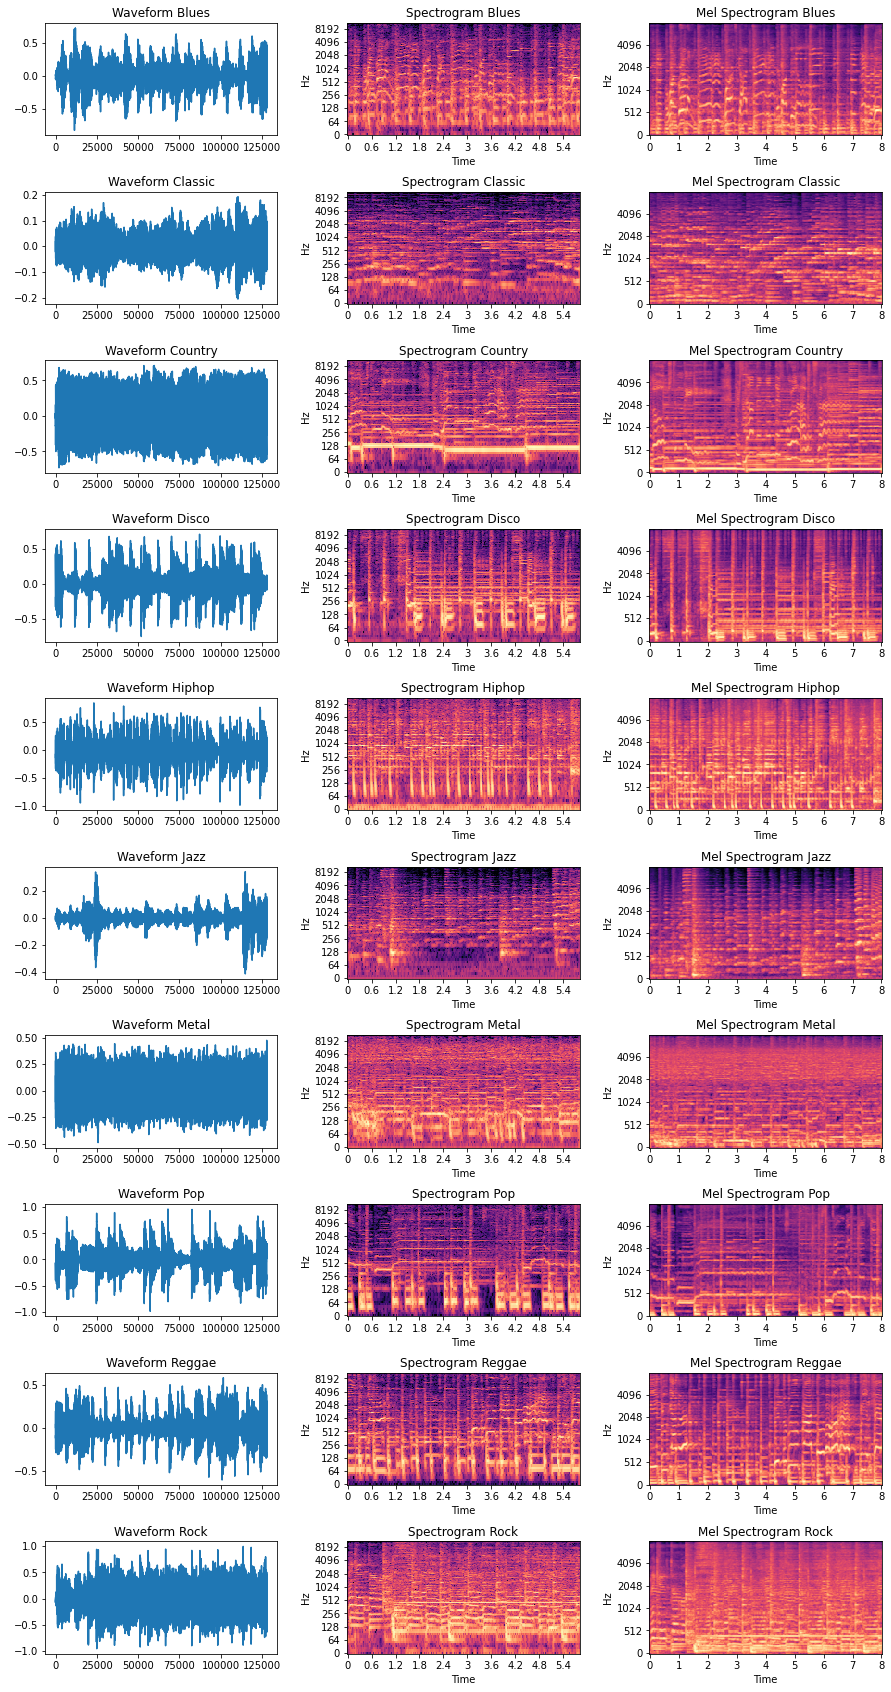

In [24]:
Genres_names = ['Blues', 'Classic', 'Country', 'Disco', 'Hiphop', 'Jazz', 'Metal', 'Pop', 'Reggae', 'Rock']
fig, axs = plt.subplots(10, 3, figsize=(15, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.3)
Hop_length =  512
Nfft = 2048
Mel = 64
for idx in range(len(audio_files)):
    audio_data, sr = librosa.load(pwd + '\Genres_10/' + audio_files[idx], sr=None)

    D = np.abs(librosa.stft(audio_data, n_fft=Nfft, hop_length=Hop_length))
    Db = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(Db, hop_length=Hop_length, x_axis='time', y_axis='log', ax=axs[idx,1])

    S = librosa.feature.melspectrogram(y=audio_data, n_fft=Nfft, hop_length=Hop_length)
    SDb = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(SDb, sr=sr, hop_length=Hop_length, x_axis='time', y_axis='mel',ax=axs[idx,2])

    axs[idx,0].plot(audio_data)
    axs[idx,0].set_title("Waveform " + Genres_names[idx])
    axs[idx,1].set_title("Spectrogram " + Genres_names[idx])
    axs[idx,2].set_title("Mel Spectrogram " + Genres_names[idx])
